# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\srini\Downloads\Telco-Customer-Churn.csv')
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Checking The Null Values

In [3]:
dataset['TotalCharges'].isin([' ']).sum()

11

In [5]:
dataset['TotalCharges']=dataset['TotalCharges'].replace([' '],[0])

In [6]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Replacing Null Values With Float Values

In [7]:
dataset['TotalCharges']=dataset['TotalCharges'].astype(float)

In [8]:
dataset.isin(['NaN']).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Checking Unique Values

In [9]:
dataset["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
dataset["MonthlyCharges"].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [11]:
dataset["TotalCharges"].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [12]:
dataset["TotalCharges"].value_counts()

0.00       11
20.20      11
19.75       9
19.90       8
19.65       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6531, dtype: int64

In [13]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Droping Unecessary Coloumns

In [14]:
dataset.drop(["customerID"], axis = 1, inplace = True)
dataset.drop(["gender"], axis = 1, inplace = True)
dataset.drop(["OnlineBackup"], axis = 1, inplace = True)
dataset.drop(["DeviceProtection"], axis = 1, inplace = True)
dataset.drop(["Contract"], axis = 1, inplace = True)
dataset.drop(["PaperlessBilling"], axis = 1, inplace = True)
dataset.drop(["Dependents"], axis = 1, inplace = True)
dataset.drop(["OnlineSecurity"], axis = 1, inplace = True)

In [15]:
dataset.head(1)

,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,1,No,No phone service,DSL,No,No,No,Electronic check,29.85,29.85,No


In [16]:
dataset['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [17]:
dataset['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

# Label Encoding

In [18]:
#converting the text data into binary values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["Partner"]  = le.fit_transform(dataset["Partner"])
dataset["PhoneService"]  = le.fit_transform(dataset["PhoneService"])
dataset["TechSupport"]  = le.fit_transform(dataset["TechSupport"])
dataset["StreamingTV"]  = le.fit_transform(dataset["StreamingTV"])
dataset["StreamingMovies"]  = le.fit_transform(dataset["StreamingMovies"])
dataset["MultipleLines"]  = le.fit_transform(dataset["MultipleLines"])
dataset["InternetService"]  = le.fit_transform(dataset["InternetService"])
dataset["PaymentMethod"]  = le.fit_transform(dataset["PaymentMethod"])

In [19]:
dataset["Churn"]  = le.fit_transform(dataset["Churn"])

In [20]:
dataset.head(2)

,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,1,0,0,0,0,2,29.85,29.85,0
1,0,0,34,1,0,0,0,0,0,3,56.95,1889.50,0


# Spliting The data into x and y

In [21]:
x = dataset.iloc[:,0:12].values
y = dataset.iloc[:,12:13].values

In [22]:
y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [23]:
x

array([[0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 2.0000e+00, 2.9850e+01,
        2.9850e+01],
       [0.0000e+00, 0.0000e+00, 3.4000e+01, ..., 3.0000e+00, 5.6950e+01,
        1.8895e+03],
       [0.0000e+00, 0.0000e+00, 2.0000e+00, ..., 3.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [0.0000e+00, 1.0000e+00, 1.1000e+01, ..., 2.0000e+00, 2.9600e+01,
        3.4645e+02],
       [1.0000e+00, 1.0000e+00, 4.0000e+00, ..., 3.0000e+00, 7.4400e+01,
        3.0660e+02],
       [0.0000e+00, 0.0000e+00, 6.6000e+01, ..., 0.0000e+00, 1.0565e+02,
        6.8445e+03]])

# OneHot Encoding

In [24]:
#If the coloum have more than two values we use onehot to convert the data into binary format
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
a= one.fit_transform(x[:,9:10]).toarray()
x = np.delete(x,(9),axis=1)
x = np.concatenate((a,x),axis=1)

In [25]:
x

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.9850e+01,
        2.9850e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 5.6950e+01,
        1.8895e+03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.9600e+01,
        3.4645e+02],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 7.4400e+01,
        3.0660e+02],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0000e+00, 1.0565e+02,
        6.8445e+03]])

In [26]:
dataset.head()

,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,1,0,0,0,0,2,29.85,29.85,0
1,0,0,34,1,0,0,0,0,0,3,56.95,1889.50,0
2,0,0,2,1,0,0,0,0,0,3,53.85,108.15,1
3,0,0,45,0,1,0,2,0,0,0,42.30,1840.75,0
4,0,0,2,1,0,1,0,0,0,2,70.70,151.65,1


# Checking Data Info

In [27]:
# To known the data types of coloumns and the count of null values in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SeniorCitizen    7043 non-null   int64  
 1   Partner          7043 non-null   int32  
 2   tenure           7043 non-null   int64  
 3   PhoneService     7043 non-null   int32  
 4   MultipleLines    7043 non-null   int32  
 5   InternetService  7043 non-null   int32  
 6   TechSupport      7043 non-null   int32  
 7   StreamingTV      7043 non-null   int32  
 8   StreamingMovies  7043 non-null   int32  
 9   PaymentMethod    7043 non-null   int32  
 10  MonthlyCharges   7043 non-null   float64
 11  TotalCharges     7043 non-null   float64
 12  Churn            7043 non-null   int32  
dtypes: float64(2), int32(9), int64(2)
memory usage: 467.8 KB


In [28]:
dataset['TotalCharges']=dataset['TotalCharges'].astype('float64')

In [29]:
dataset['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [30]:
dataset.isnull().any()

SeniorCitizen      False
Partner            False
tenure             False
PhoneService       False
MultipleLines      False
InternetService    False
TechSupport        False
StreamingTV        False
StreamingMovies    False
PaymentMethod      False
MonthlyCharges     False
TotalCharges       False
Churn              False
dtype: bool

# Feature Scalling

# Training And Testing The Model

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
x_train.shape

(5634, 15)

In [33]:
y_train.shape

(5634, 1)

In [34]:
x_train[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 7.2000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       2.0000e+00, 2.0000e+00, 2.0000e+00, 8.5100e+01, 6.1554e+03])

# Random Forest Algorithm

In [35]:
#The dataset is classification so we used classifier 
from sklearn.ensemble import RandomForestClassifier

In [36]:
# as we know for classification the criterion is entropy 
rf= RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
rf.fit(x_train,y_train)

C:\Users\srini\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

# Predicting the values

In [37]:
y_pred1=rf.predict(x_test)

In [38]:
y_pred1

array([0, 0, 0, ..., 0, 0, 1])

# Finding Accuracy

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)


0.7700496806245565

# Ploting roc_auc graph

In [40]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred1)
roc_auc=metrics.auc(fpr,tpr)

Text(0.5, 0, 'false positive rate')

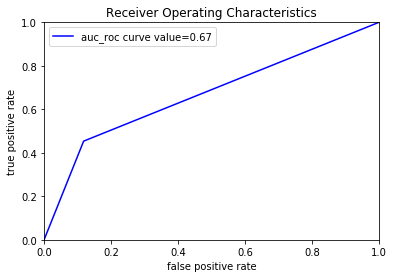

In [41]:
import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristics")
plt.plot(fpr,tpr,color="blue",label="auc_roc curve value=%0.2f"%roc_auc)
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")

# Importing pickle To Store The Output values

In [42]:
import pickle
pickle.dump(rf,open('Churn.pkl','wb'))